In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2608.jpg', 'with_mask_3027.jpg', 'with_mask_683.jpg', 'with_mask_2534.jpg', 'with_mask_1562.jpg']
['with_mask_1455.jpg', 'with_mask_3513.jpg', 'with_mask_1068.jpg', 'with_mask_1019.jpg', 'with_mask_1958.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1052.jpg', 'without_mask_1367.jpg', 'without_mask_2280.jpg', 'without_mask_759.jpg', 'without_mask_355.jpg']
['without_mask_190.jpg', 'without_mask_2166.jpg', 'without_mask_2211.jpg', 'without_mask_765.jpg', 'without_mask_2861.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [13]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


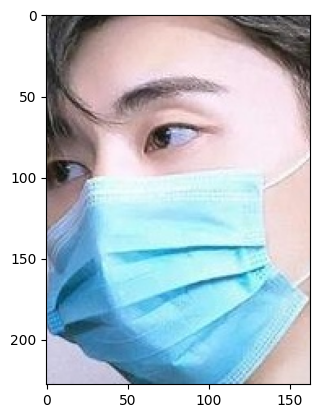

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

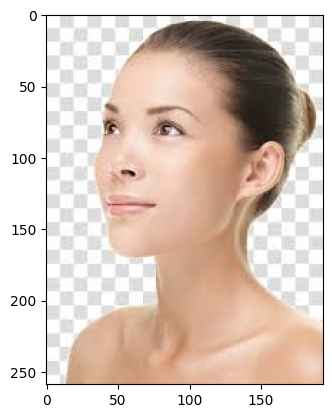

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[156, 155, 161],
        [157, 156, 162],
        [157, 157, 163],
        ...,
        [  3,  15,  31],
        [  3,  15,  31],
        [  5,  14,  31]],

       [[155, 154, 160],
        [155, 156, 161],
        [155, 157, 162],
        ...,
        [  3,  15,  31],
        [  3,  15,  31],
        [  5,  14,  31]],

       [[153, 153, 160],
        [152, 154, 161],
        [152, 155, 162],
        ...,
        [  3,  15,  31],
        [  3,  15,  31],
        [  5,  14,  31]],

       ...,

       [[115, 123, 136],
        [116, 124, 137],
        [118, 126, 139],
        ...,
        [ 98, 116, 128],
        [ 95, 113, 125],
        [ 93, 111, 122]],

       [[113, 121, 134],
        [114, 122, 135],
        [116, 124, 137],
        ...,
        [ 98, 116, 128],
        [ 93, 112, 124],
        [ 92, 110, 121]],

       [[114, 122, 135],
        [115, 123, 136],
        [116, 124, 137],
        ...,
        [ 80, 100, 111],
        [ 89, 110, 120],
        [ 91, 112, 121]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[ 50,  33,  39],
        [ 49,  32,  38],
        [ 50,  35,  38],
        ...,
        [234, 214, 177],
        [238, 215, 178],
        [237, 213, 177]],

       [[ 48,  32,  37],
        [ 48,  31,  36],
        [ 50,  35,  38],
        ...,
        [219, 198, 159],
        [242, 218, 181],
        [235, 211, 174]],

       [[ 48,  32,  35],
        [ 48,  32,  35],
        [ 49,  34,  38],
        ...,
        [207, 186, 146],
        [216, 193, 154],
        [234, 211, 172]],

       ...,

       [[232, 206, 149],
        [242, 216, 159],
        [249, 222, 167],
        ...,
        [126, 105, 104],
        [118,  97,  96],
        [134, 113, 112]],

       [[234, 208, 152],
        [238, 211, 156],
        [241, 214, 159],
        ...,
        [125, 104, 103],
        [122, 101, 100],
        [120,  99,  98]],

       [[242, 215, 160],
        [235, 208, 153],
        [231, 204, 149],
        ...,
        [127, 106, 105],
        [127, 106, 105],
        [119,  98,  97]]

In [34]:
X_train_scaled[0]

array([[[0.19607843, 0.12941176, 0.15294118],
        [0.19215686, 0.1254902 , 0.14901961],
        [0.19607843, 0.1372549 , 0.14901961],
        ...,
        [0.91764706, 0.83921569, 0.69411765],
        [0.93333333, 0.84313725, 0.69803922],
        [0.92941176, 0.83529412, 0.69411765]],

       [[0.18823529, 0.1254902 , 0.14509804],
        [0.18823529, 0.12156863, 0.14117647],
        [0.19607843, 0.1372549 , 0.14901961],
        ...,
        [0.85882353, 0.77647059, 0.62352941],
        [0.94901961, 0.85490196, 0.70980392],
        [0.92156863, 0.82745098, 0.68235294]],

       [[0.18823529, 0.1254902 , 0.1372549 ],
        [0.18823529, 0.1254902 , 0.1372549 ],
        [0.19215686, 0.13333333, 0.14901961],
        ...,
        [0.81176471, 0.72941176, 0.57254902],
        [0.84705882, 0.75686275, 0.60392157],
        [0.91764706, 0.82745098, 0.6745098 ]],

       ...,

       [[0.90980392, 0.80784314, 0.58431373],
        [0.94901961, 0.84705882, 0.62352941],
        [0.97647059, 0

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 4s 22ms/step - loss: 0.1385 - acc: 0.9456 - val_loss: 0.2047 - val_acc: 0.9355
Epoch 2/5
170/170 [==============================] - 3s 21ms/step - loss: 0.1055 - acc: 0.9638 - val_loss: 0.2413 - val_acc: 0.9157
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.0815 - acc: 0.9695 - val_loss: 0.2110 - val_acc: 0.9306
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.0831 - acc: 0.9720 - val_loss: 0.2096 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 3s 21ms/step - loss: 0.0667 - acc: 0.9772 - val_loss: 0.2639 - val_acc: 0.9355


In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2169 - acc: 0.9378
Test Accuracy = 0.9377895593643188


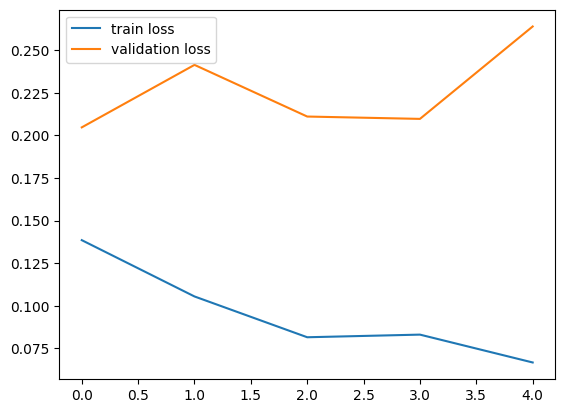

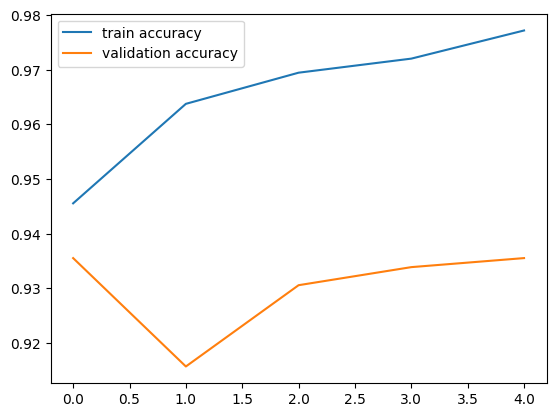

In [53]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1385.jpg


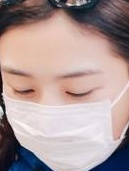

1/1 [==============================] - 0s 22ms/step
[[0.29368603 0.7034342 ]]
1
The person in the image is wearing a mask


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1114.jpg


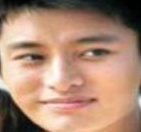

1/1 [==============================] - 0s 25ms/step
[[0.6040857  0.47791952]]
0
The person in the image is not wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')